In [1]:
# probability distrubutions

from scipy import stats

In [2]:
# area of <=70 marks
stats.norm.cdf(70,loc=60,scale=10)

0.8413447460685429

In [3]:

#area of >=80marks
1-stats.norm.cdf(80,loc=60,scale=10)

0.02275013194817921

In [4]:
#area of <=680
stats.norm.cdf(680,loc=711,scale=29)

0.14254260383881612

In [5]:
#area of >750
1-stats.norm.cdf(750,loc=711,scale=29)

0.08934045974656879

In [6]:
#area b/w 680 to 740
stats.norm.cdf(range(680,740),loc=711,scale=29)

array([0.1425426 , 0.15045527, 0.15865525, 0.1671429 , 0.17591786,
       0.18497908, 0.19432478, 0.20395244, 0.21385878, 0.22403975,
       0.23449053, 0.24520553, 0.25617838, 0.26740192, 0.27886824,
       0.29056868, 0.30249383, 0.31463357, 0.32697706, 0.33951282,
       0.35222871, 0.365112  , 0.37814937, 0.391327  , 0.40463057,
       0.41804532, 0.43155611, 0.44514746, 0.4588036 , 0.47250853,
       0.4862461 , 0.5       , 0.5137539 , 0.52749147, 0.5411964 ,
       0.55485254, 0.56844389, 0.58195468, 0.59536943, 0.608673  ,
       0.62185063, 0.634888  , 0.64777129, 0.66048718, 0.67302294,
       0.68536643, 0.69750617, 0.70943132, 0.72113176, 0.73259808,
       0.74382162, 0.75479447, 0.76550947, 0.77596025, 0.78614122,
       0.79604756, 0.80567522, 0.81502092, 0.82408214, 0.8328571 ])

In [8]:
#area b/w 680 to 740
stats.norm.cdf(740,loc=711,scale=29)-stats.norm.cdf(680,loc=711,scale=29)

0.6988021422297268

In [9]:
from scipy import stats
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [11]:
beml_df=pd.read_csv("/content/BEML.csv")
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [12]:
glaxo_df=pd.read_csv("/content/GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [13]:
beml_df=beml_df[["Date","Close"]]
glaxo_df=glaxo_df[["Date","Close"]]

In [14]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [15]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [16]:
beml_df.dtypes

,0
Date,object
Close,float64


In [17]:
glaxo_df.dtypes

,0
Date,object
Close,float64


In [19]:
#The dataframes have a date column
# Create a DatetimeIndex index from this column date. It will ensure that the rows are sorted by time in ascending order
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df["Date"]))
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df["Date"]))

In [20]:
beml_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [21]:
glaxo_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


Text(0, 0.5, 'close Price')

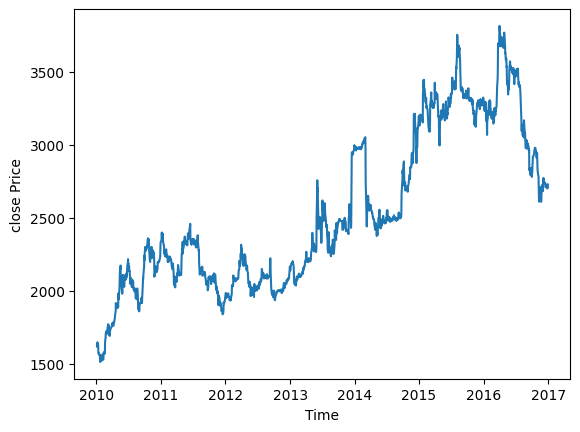

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(glaxo_df.Close)
plt.xlabel("Time")
plt.ylabel("close Price")


Text(0, 0.5, 'close Price')

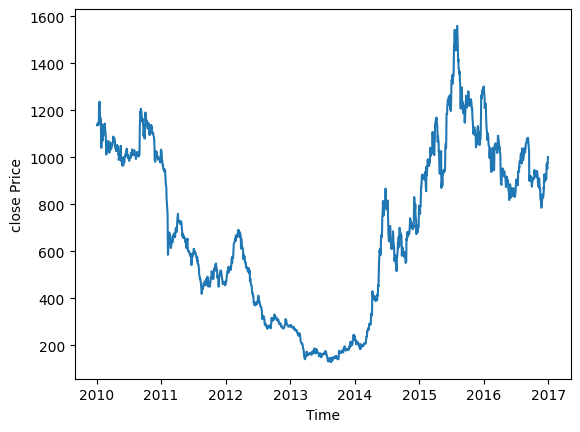

In [24]:
plt.plot(beml_df.Close)
plt.xlabel("Time")
plt.ylabel("close Price")

In [25]:
#gain is for each day. we are assumming that gain is coming from normal distrubution
glaxo_df["gain"]=glaxo_df.Close.pct_change(periods=1)
beml_df["gain"]=beml_df.Close.pct_change(periods=1)

In [26]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [27]:
beml_d  f

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [28]:
#drop the first row since it is NaN
glaxo_df=glaxo_df.dropna()
beml_df=beml_df.dropna()

In [29]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [30]:
beml_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


Text(0, 0.5, 'gain')

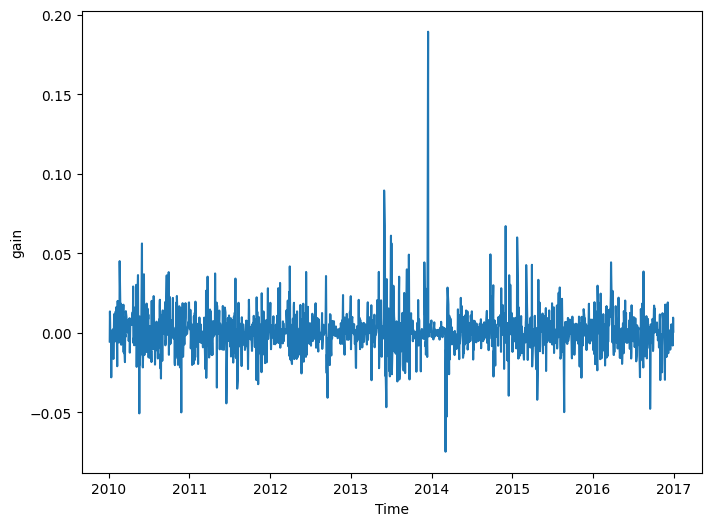

In [31]:
#GLAXO: plot the gains. Over the years gain is not changing much

plt.figure(figsize=(8,6))
plt.plot(glaxo_df['gain'])
plt.xlabel("Time")
plt.ylabel("gain")

Text(0, 0.5, 'gain')

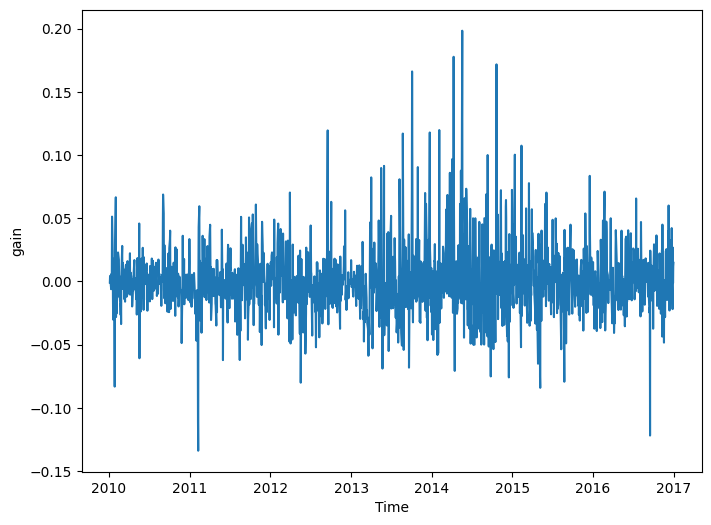

In [32]:
plt.figure(figsize=(8,6))
plt.plot(beml_df['gain'])
plt.xlabel("Time")
plt.ylabel("gain")

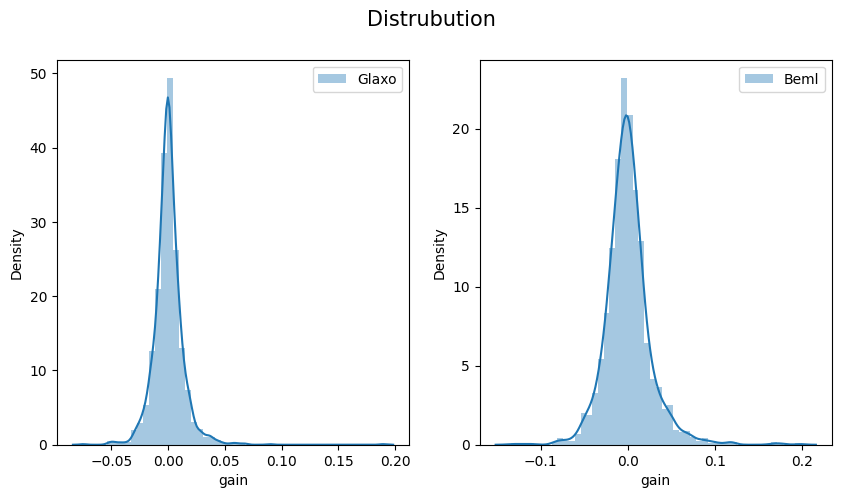

In [33]:
plt.figure(figsize=(10,5))
plt.suptitle("Distrubution", fontsize=15)
plt.subplot(1,2,1)
sns.distplot(glaxo_df['gain'],label="Glaxo")
plt.xlabel("gain")
plt.ylabel("Density")
plt.legend()
plt.subplot(1,2,2)
sns.distplot(beml_df['gain'],label="Beml")
plt.xlabel("gain")
plt.ylabel("Density")
plt.legend()

#Bell shaped normal distrubution

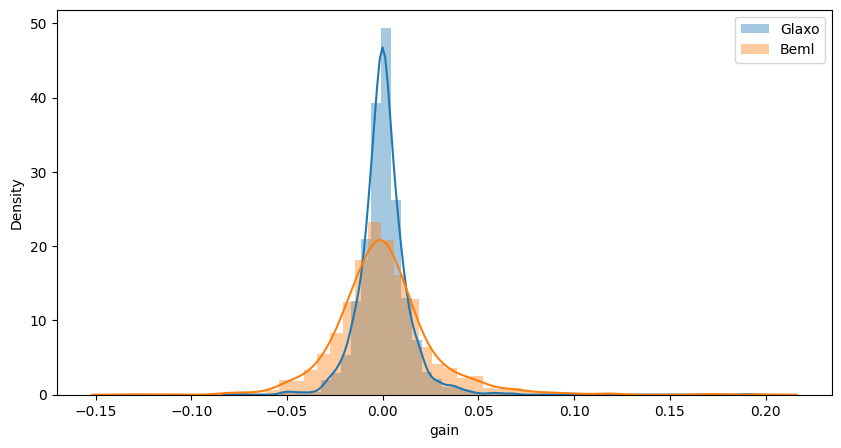

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(glaxo_df['gain'],label="Glaxo")
sns.distplot(beml_df['gain'],label="Beml")
plt.xlabel("gain")
plt.ylabel("Density")
plt.legend()

In [35]:
# Glaxo Mean and Standard deviation
print("Glaxo Mean:",round(glaxo_df.gain.mean(),4))
print("Glaxo Standard Deviation:",round(glaxo_df.gain.std(),4))

Glaxo Mean: 0.0004
Glaxo Standard Deviation: 0.0134


In [37]:
glaxo_df.gain.mean()

0.0003860410825922916

In [38]:
#BEML Mean and Standard deviation
print("BEML Mean:",round(beml_df.gain.mean(),4))
print("BEML Standard Deviation:",round(beml_df.gain.std(),4))

BEML Mean: 0.0003
BEML Standard Deviation: 0.0264


## **2% loss or higher loss in Glaxo **

In [39]:
from scipy import stats
# probability of making  2% loss or higher loss in Glaxo
stats.norm.cdf(-0.002,loc=0.0004,scale=0.0134)
#loc=glaxo_df.gain.mean()
#scale=glaxo_df.gain.std()

0.4289278331163059

## **2% loss or gain for BEML**

In [40]:
#2% loss
stats.norm.cdf(-0.002,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.46576784793245896

In [41]:
# 2% gain or higher gain
1-stats.norm.cdf(0.002,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.4739175873072786

## **norm.cdf() and norm.ppf() function difference**

In [42]:
#CDF(cumulative distrubution function): Claculates probability for a given normal distrubution
#PPF(percent point function):calculates normal distrubution value for a given probability
stats.norm.ppf(0.46576784793245896,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

-0.002

In [43]:
stats.norm.cdf(-0.002,loc=beml_df.gain.mean(),scale=beml_df.gain.std())

0.46576784793245896